In [54]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import clone             # make a copy of an estimator 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc

In [3]:
data = pd.read_csv("medical_no_shows.csv")

# this performance excludes 'object' datatype columns
# future improvements need to be made to usilize this data 
# e.g. convert datetime to day of the week and time of day

In [71]:
X = data.drop(columns = 'No-show')
X = X.loc[:, np.array(X.dtypes != 'object')]

y = data["No-show"]
y = y == "Yes"
y = y.astype(int)

In [72]:
pca = PCA(n_components = .95)
X_reduced = pca.fit_transform(X.loc[:, np.array(X.dtypes != 'object')])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
red_train, red_test, _, _ = train_test_split(X_reduced, y)

In [74]:
rf_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, 
                                n_jobs = -1, max_depth = 15)

rf_reduced_clf = clone(rf_clf)

In [75]:
rf_clf.fit(X_train, y_train)
rf_reduced_clf.fit(red_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [76]:
red_pred = rf_reduced_clf.predict(red_test)
pred = rf_clf.predict(X_test)

print("""
Full Acc {}    Red Acc {}
Full MSE {}    Red MSE {}
""".format(acc(y_test, pred), acc(y_test, red_pred), mse(y_test, pred), mse(y_test, red_pred)))


Full Acc 0.7982411696583671    Red Acc 0.796685002895194
Full MSE 0.2017588303416329    Red MSE 0.20331499710480602



<h2>MNIST example</h2>

In [118]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
mnist = fetch_openml('mnist_784',version = 1)

In [100]:
X = mnist["data"]
y = mnist["target"]

pca = PCA(n_components = .95, random_state = 42)
X_red = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
red_train, red_test, _, _ = train_test_split(X_red, y)

In [101]:
mnist_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, 
                                   n_jobs = 4, max_depth = 12)
mnist_red = clone(mnist_clf)

mnist_red.fit(red_train, y_train)
mnist_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
pred = mnist_clf.predict(X_test)
acc(y_test, pred)

0.9578285714285715

In [105]:
red_pred = mnist_red.predict(red_test)
acc(y_test, red_pred)

0.11102857142857143

In [108]:
X_red.shape

(70000, 154)

In [109]:
X.shape

(70000, 784)

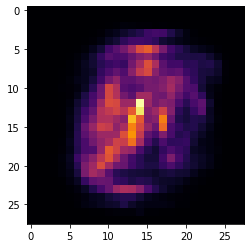

In [121]:
plt.imshow(mnist_clf.feature_importances_.reshape(28,28), cmap = 'inferno')